# Trabajo Final: Gonzalo Hernán Domínguez
### Manejo de datos en biología computacional. Herramientas de estadística

1. <b>Objetivo</b>: El trabajo final tiene como objetivo sistematizar y aplicar el diseño de experimentos, el manejo automatizado de datos y el análisis estadístico utilizando lenguajes de programación.
2. <b>Forma de entrega</b>: El trabajo práctico se realizará de forma individual, y se entregará el día 21 de junio. El mismo deberá además estar en un repositorio pública en Github (creado para la materia), el cual deberá contener un archivo README.md con los datos de los integrantes del equipo. Los trabajos serán presentados por los miembros del equipo en una exposición oral en los días 27 de junio o 4 de julio.
3. <b>Dataset</b>: para poder realizar el trabajo utilizarán una tabla propia la cual debe contener información tanto discreta como continua. Sobre la misma plantearemos un conjunto de hipótesis que nos lleven a comparar grupos de datos continuos y discretos.
4. <b>Pautas a seguir</b>:
    * Realizar una descripción del sistema que se intenta estudiar y de las variables medidas sobre la muestra. ¿Qué criterio se utilizó para la toma de muestra?
    * Representar de forma gráfica las distribuciones de frecuencias de las variables.
    * Registrar las medidas características de cada distribución (centralización y dispersión).
    * Estimar los intervalos de confianza.
    * Determinar el tamaño de la muestra.
    * Ensayos de hipótesis:
        * Realizar un contraste de hipótesis para dos o más poblaciones.
        * Realizar un análisis de dependencia de variables categóricas.
        * Evaluar el ajuste de una recta de regresión e interpretar el coeficiente de correlación.

### Importamos las librerías a utilizar

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower as smp

### Dataset utilizado: Qualidiab
El registro de Qualidiab es una base de datos sobre la situación real de las personas con diabetes en nuestra región. Permite determinar el grado de control clínico y metabólico de cada paciente, evaluar la frecuencia de complicaciones agudas y crónicas, analizar el acceso a la atención médica y los medicamentos, evaluar la adherencia al tratamiento y estudiar los patrones de prescripción.

In [2]:
fichas = pd.read_excel('fichas_dm2.xlsx', sheet_name='Sheet1')

In [3]:
fichas

,id_ficha,paciente_id,cobertura_privado,cobertura_obra_social,cobertura_no,antecedentes_hta,antecedentes_dm2,antecedentes_dm1,antecedentes_tag,antecedentes_gaa,...,trata_diabetes,trata_dislipemia,trata_insulina,monoterapia_oral,combinado_oral,oral_con_insulina,comp_macrovasculares,comp_microvasculares,edad_en_registro,anios_con_enfermedad
0,4774,5599,0,1,0,1,1,0,0,0,...,1,1,0,1,0,0,1,1,77,7
1,5876,5632,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,1,62,9
2,4127,5710,0,1,0,1,1,0,0,0,...,1,1,0,1,0,0,1,1,53,2
3,411,5947,0,0,1,1,1,0,0,0,...,0,0,1,0,0,0,1,1,62,-3
4,5241,5963,0,0,1,0,1,0,0,0,...,1,0,1,1,0,1,1,1,54,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,7708,13124,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,1,1,60,10
3311,12847,17486,0,1,0,1,1,0,0,0,...,1,1,0,1,0,0,1,1,80,12
3312,7609,13036,0,0,1,0,1,0,0,0,...,1,0,1,1,0,1,1,1,72,4
3313,12651,17266,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,1,1,87,17


### Hipótesis
* Existe una correlación entre el nivel de azúcar en sangre (HbA1c) y la glucemia en ayunas.
* Se plantea una relación entre el buen control de HbA1c y la presencia de antecedentes de dislipemia.

---

## Análisis de dependencia de variables categóricas: relación entre buen control de hba1c y antecedentes de dislipemia

Hemos creado una nueva columna categórica, identificando a aquellos pacientes con un buen control metabólico como aquellos cuya HbA1c es menor o igual al 7%.

In [60]:
def buen_control_hba1c(valor):
    if valor <= 7:
        return 1
    else:
        return 0

fichas['buen_control_hba1c'] = fichas['exploraciones_hba1c_valor'].apply(buen_control_hba1c)

In [61]:
a = fichas['buen_control_hba1c'] == 1
b = fichas['antecedentes_dislipemia'] == 1

In [66]:
# Comparamos los datos en una tabla de contingencia
groups = fichas.groupby([a,b]).count() 
groups['buen_control_hba1c']

buen_control_hba1c  antecedentes_dislipemia
False               False                      983
                    True                       988
True                False                      674
                    True                       670
Name: buen_control_hba1c, dtype: int64

In [69]:
# Test de comparación de datos cualitativos
print(ss.chisquare(groups['buen_control_hba1c'], ddof=0, axis=0))

Power_divergenceResult(statistic=118.61568627450981, pvalue=1.5330568489577969e-25)


Este p-valor es extremadamente pequeño , lo que indica que la probabilidad de observar una diferencia tan grande en las frecuencias observadas y esperadas por azar es extremadamente baja.

En el contexto de la prueba de Chi-cuadrado: 

* Hipótesis nula (H0): No hay asociación entre las variables buen_control_hba1c y antecedentes_dislipemia (son independientes).
* Hipótesis alternativa (H1): Hay una asociación entre las variables buen_control_hba1c y antecedentes_dislipemia (no son independientes).

Dado que el p-valor es mucho menor que cualquier nivel de significancia comúnmente usado (como 0.05, 0.01, o incluso 0.001), podemos rechazar la hipótesis nula. Esto sugiere que hay una asociación significativa entre buen_control_hba1c y antecedentes_dislipemia.

--- 

## Correlación entre hb1ac y glucemia en ayunas

##### Medidas de centralización y dispersión

In [76]:
# Calculamos las medidas de centralización y dispersión para 'exploraciones_hba1c_valor' y para 'exploraciones_glucemia_ayunas_valor'
fichas.describe()[['exploraciones_hba1c_valor', 'exploraciones_glucemia_ayunas_valor']]

,exploraciones_hba1c_valor,exploraciones_glucemia_ayunas_valor
count,3315.000000,3315.000000
mean,7.811566,149.556259
min,0.000000,12.000000
25%,6.500000,109.000000
50%,7.400000,133.000000
75%,8.610000,172.000000
max,18.000000,583.000000
std,1.931524,61.874765


In [81]:
# Calculamos el rango e IQR para 'exploraciones_hba1c_valor'
hba1c_range = fichas['exploraciones_hba1c_valor'].max() - fichas['exploraciones_hba1c_valor'].min()
hba1c_iqr = fichas['exploraciones_hba1c_valor'].quantile(0.75) - fichas['exploraciones_hba1c_valor'].quantile(0.25)

# Calculamos el rango e IQR para 'exploraciones_glucemia_ayunas_valor'
glucemia_range = fichas['exploraciones_glucemia_ayunas_valor'].max() - fichas['exploraciones_glucemia_ayunas_valor'].min()
glucemia_iqr = fichas['exploraciones_glucemia_ayunas_valor'].quantile(0.75) - fichas['exploraciones_glucemia_ayunas_valor'].quantile(0.25)

# Imprimir los resultados
print("Medidas de 'exploraciones_hba1c_valor':")
print(f"Rango: {hba1c_range}")
print(f"Rango intercuartílico (IQR): {hba1c_iqr}")

print("\nMedidas de 'exploraciones_glucemia_ayunas_valor':")
print(f"Rango: {glucemia_range}")
print(f"Rango intercuartílico (IQR): {glucemia_iqr}")

Medidas de 'exploraciones_hba1c_valor':
Rango: 18.0
Rango intercuartílico (IQR): 2.1099999999999994

Medidas de 'exploraciones_glucemia_ayunas_valor':
Rango: 571
Rango intercuartílico (IQR): 63.0


##### Tamaño de la muestra

In [49]:
# Calcular la media y la desviación estándar de los datos existentes
datos_mean1 = np.mean(fichas['exploraciones_hba1c_valor'])
datos_mean2 = np.mean(fichas['exploraciones_glucemia_ayunas_valor'])
datos_std = np.std(fichas['exploraciones_glucemia_ayunas_valor'], ddof=1)

# Definir los parámetros de la prueba
effect_size = abs(datos_mean1 - datos_mean2)/ datos_std
alpha = 0.05
power = 0.8

# Crear una instancia de la clase TTestIndPower
ttp = TTestIndPower()

# Calcular el tamaño muestral necesario
n = ttp.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')

# Imprimir el resultado
print("El tamaño muestral necesario es:", round(n))

El tamaño muestral necesario es: 4


##### Intervalos de confianza

In [75]:
from scipy.stats import norm

# Función para calcular el intervalo de confianza
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    margin_of_error = std_err * norm.ppf((1 + confidence) / 2)
    return mean - margin_of_error, mean + margin_of_error

# Calcular el intervalo de confianza para 'exploraciones_hba1c_valor'
hba1c_ci_lower, hba1c_ci_upper = calculate_confidence_interval(fichas['exploraciones_hba1c_valor'])

# Calcular el intervalo de confianza para 'exploraciones_glucemia_ayunas_valor'
glucemia_ci_lower, glucemia_ci_upper = calculate_confidence_interval(fichas['exploraciones_glucemia_ayunas_valor'])

# Imprimir los resultados
print("Intervalo de confianza del 95% para 'exploraciones_hba1c_valor':")
print(f"({hba1c_ci_lower}, {hba1c_ci_upper})")

print("\nIntervalo de confianza del 95% para 'exploraciones_glucemia_ayunas_valor':")
print(f"({glucemia_ci_lower}, {glucemia_ci_upper})")

Intervalo de confianza del 95% para 'exploraciones_hba1c_valor':
(7.745813985971088, 7.87731723574837)

Intervalo de confianza del 95% para 'exploraciones_glucemia_ayunas_valor':
(147.44996109110343, 151.66255776259192)


##### Forma gráfica las distribuciones de frecuencias de las variables

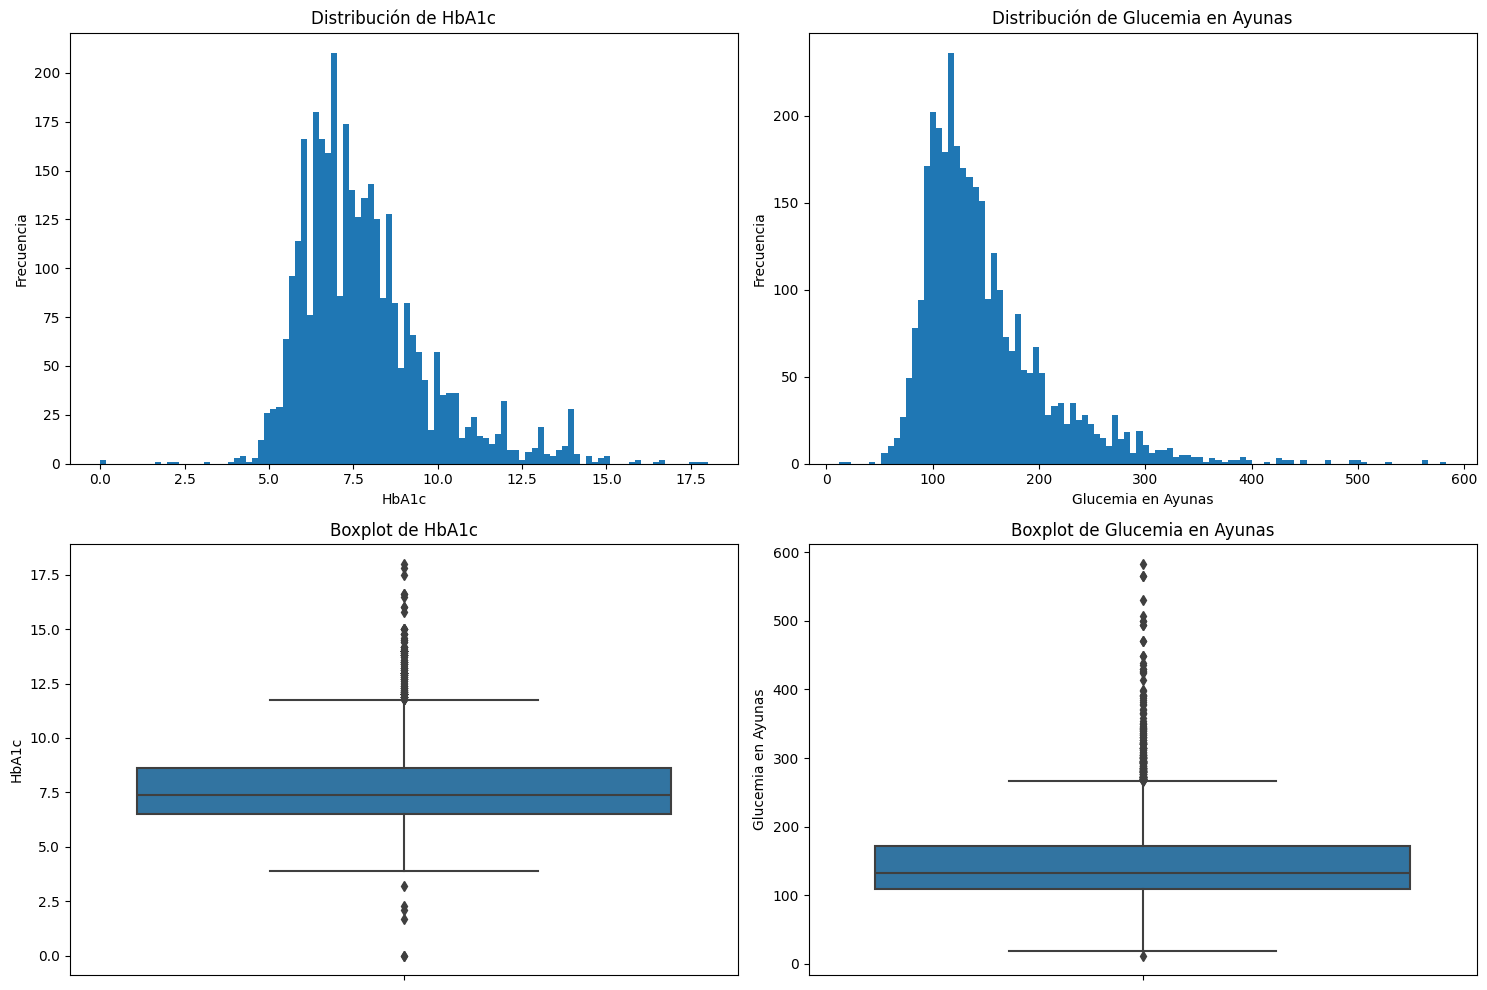

In [78]:
# Crear una figura con cuatro subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Primer gráfico (histograma de HbA1c)
axes[0, 0].hist(fichas['exploraciones_hba1c_valor'], bins=100)
axes[0, 0].set_title('Distribución de HbA1c')
axes[0, 0].set_xlabel('HbA1c')
axes[0, 0].set_ylabel('Frecuencia')

# Segundo gráfico (histograma de Glucemia en Ayunas)
axes[0, 1].hist(fichas['exploraciones_glucemia_ayunas_valor'], bins=100)
axes[0, 1].set_title('Distribución de Glucemia en Ayunas')
axes[0, 1].set_xlabel('Glucemia en Ayunas')
axes[0, 1].set_ylabel('Frecuencia')

# Tercer gráfico (boxplot de HbA1c)
sns.boxplot(y=fichas['exploraciones_hba1c_valor'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de HbA1c')
axes[1, 0].set_ylabel('HbA1c')

# Cuarto gráfico (boxplot de Glucemia en Ayunas)
sns.boxplot(y=fichas['exploraciones_glucemia_ayunas_valor'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Glucemia en Ayunas')
axes[1, 1].set_ylabel('Glucemia en Ayunas')

# Ajustar el diseño para que los gráficos no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()

##### Test de normalidad

In [16]:
print("Test de normalidad hba1c: ", ss.normaltest(fichas['exploraciones_hba1c_valor']))
print("Test de normalidad glucemia en ayunas: ", ss.normaltest(fichas['exploraciones_glucemia_ayunas_valor']))

Test de normalidad hba1c:  NormaltestResult(statistic=741.6071966079205, pvalue=9.163120266007718e-162)
Test de normalidad glucemia en ayunas:  NormaltestResult(statistic=1388.861696704899, pvalue=2.5853211384481055e-302)


Como las distribuciones no son normales, deberíamos utilizar un test de correlación para datos no paramétricos. Esa correlación es la prueba de Spearman. 

In [79]:
x = fichas['exploraciones_hba1c_valor'][:]
y = fichas['exploraciones_glucemia_ayunas_valor'][:]
ss.spearmanr(x, y)

SignificanceResult(statistic=0.5719014197437254, pvalue=2.6002198374445652e-287)

* En este caso, 0.5719 sugiere una correlación moderada positiva.
* Dado que este valor p es significativamente menor que cualquier nivel de significancia común (por ejemplo, 0.05), generalmente se interpreta como evidencia muy fuerte en contra de la hipótesis nula. Esto sugiere que hay una correlación significativa entre exploraciones_hba1c_valor y exploraciones_glucemia_ayunas_valor.

Los valores de HbA1c y los de glucemia en ayunas tienden a variar juntos en una dirección monotónica positiva.

<Axes: xlabel='exploraciones_hba1c_valor', ylabel='exploraciones_glucemia_ayunas_valor'>

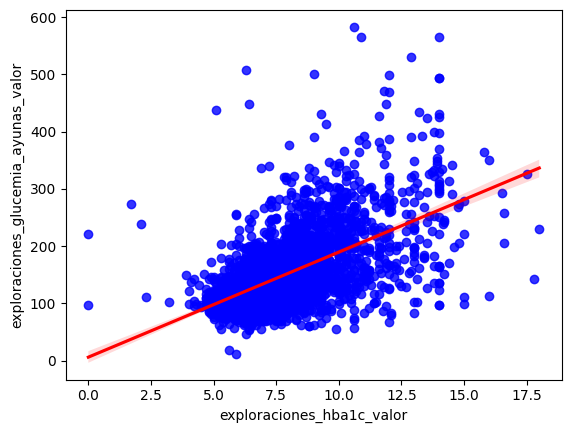

In [8]:
sns.regplot(x=x, y=y, color="blue", line_kws=dict(color="r"))

In [12]:
X = x
Y = y

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     exploraciones_glucemia_ayunas_valor   R-squared:                       0.328
Model:                                             OLS   Adj. R-squared:                  0.328
Method:                                  Least Squares   F-statistic:                     1616.
Date:                                 Fri, 05 Jul 2024   Prob (F-statistic):          3.46e-288
Time:                                         15:02:29   Log-Likelihood:                -17719.
No. Observations:                                 3315   AIC:                         3.544e+04
Df Residuals:                                     3313   BIC:                         3.546e+04
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                                coef    